In [1]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
steps = np.random.standard_normal(1000)
steps[0]=0
random_walk = np.cumsum(steps)

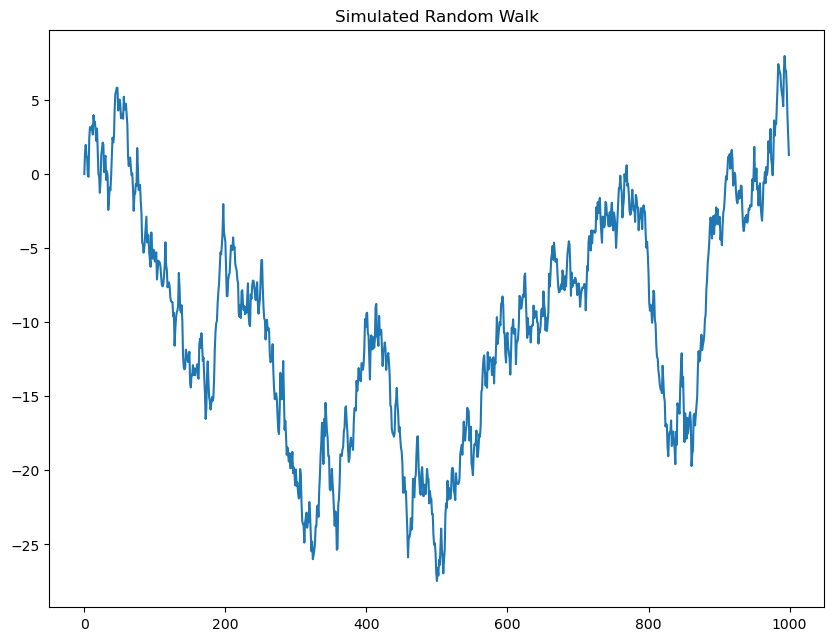

In [3]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(random_walk)
plt.title("Simulated Random Walk")
plt.show()

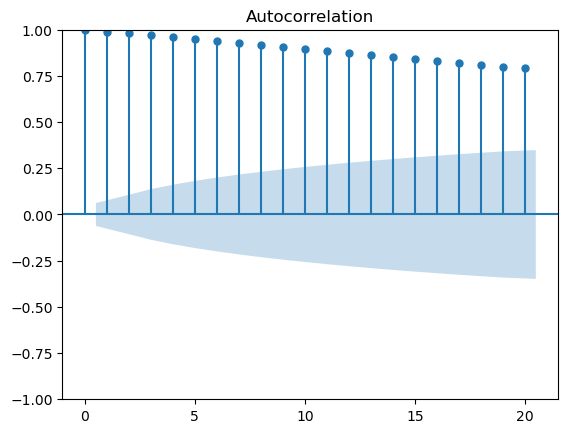

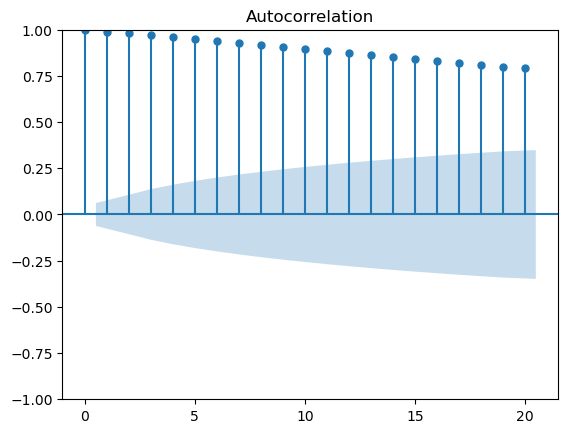

In [4]:
random_walk_acf_coef = acf(random_walk)
plot_acf(random_walk, lags=20)

In [5]:
random_walk_diff = np.diff(random_walk, n=1)

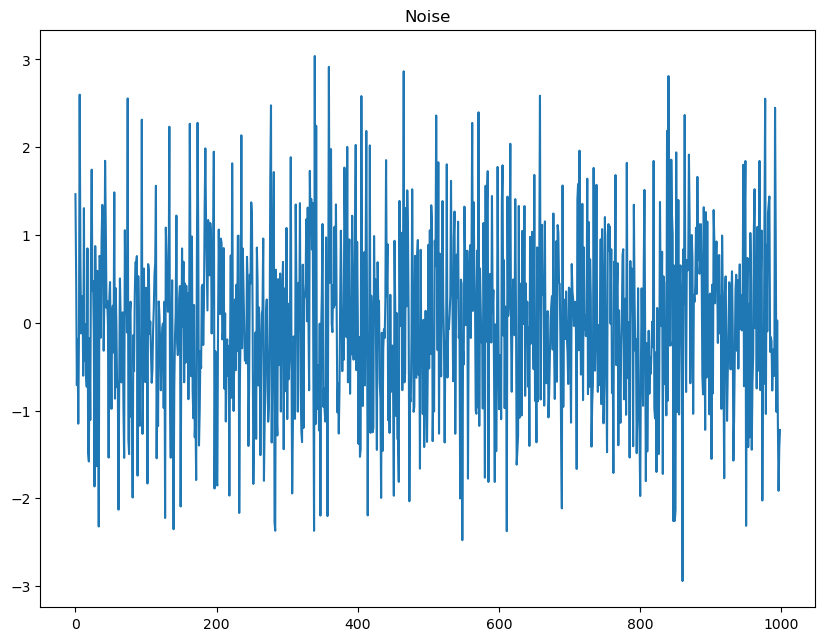

In [6]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(random_walk_diff)
plt.title('Noise')
plt.show()


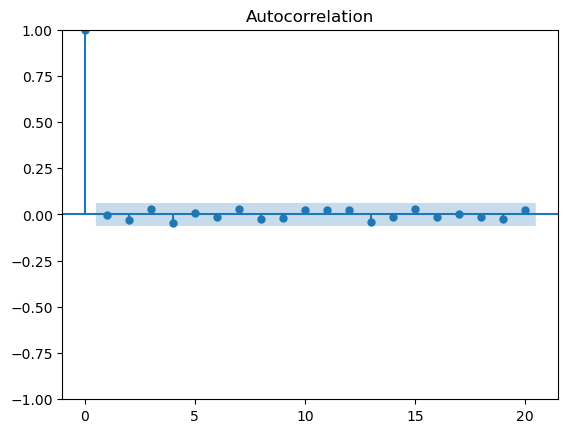

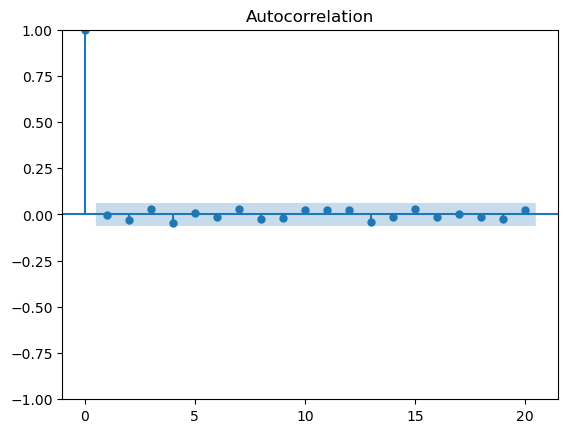

In [7]:
plot_acf(random_walk_diff, lags=20)

![image.png](attachment:image.png)

In [8]:
ar2 = np.array([1,2])
ma2 = np.array([1])

In [9]:
MA2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

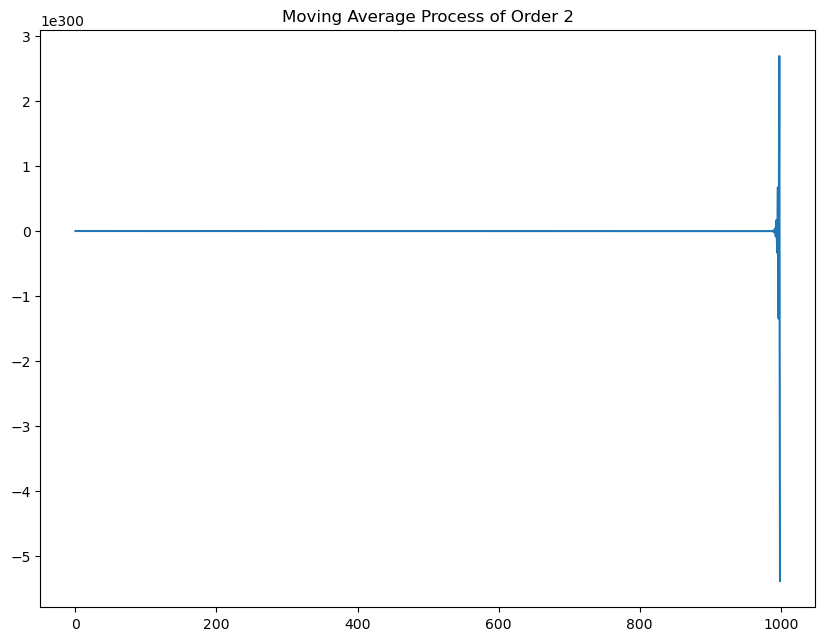

In [10]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(MA2_process)
plt.title('Moving Average Process of Order 2')
plt.show()

![image.png](attachment:image.png)

In [11]:
ar2 = np.array([1, 0.33, 0.5])
ma = np.array([1])
simulated_AR2_data = ArmaProcess(ar2, ma).generate_sample(nsample=10000)

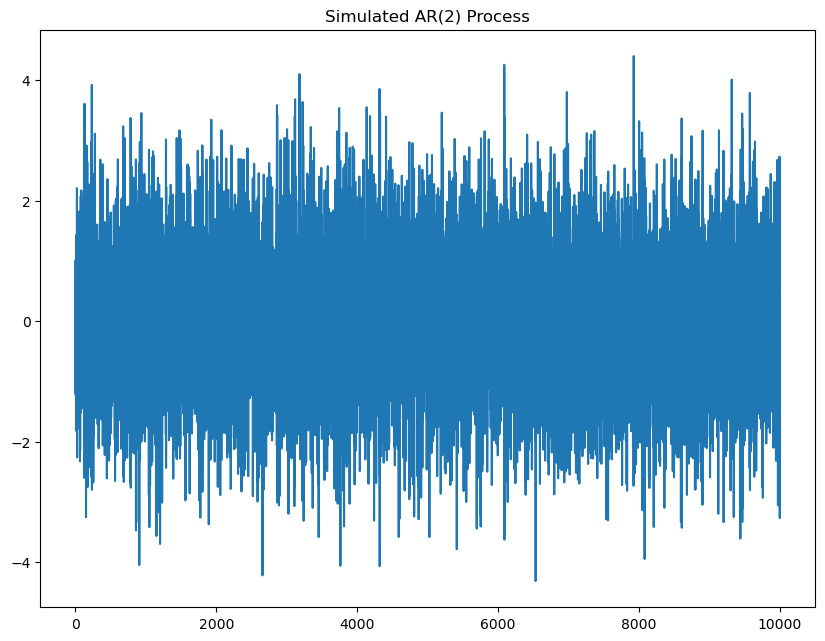

In [12]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(simulated_AR2_data)
plt.title("Simulated AR(2) Process")
plt.show()

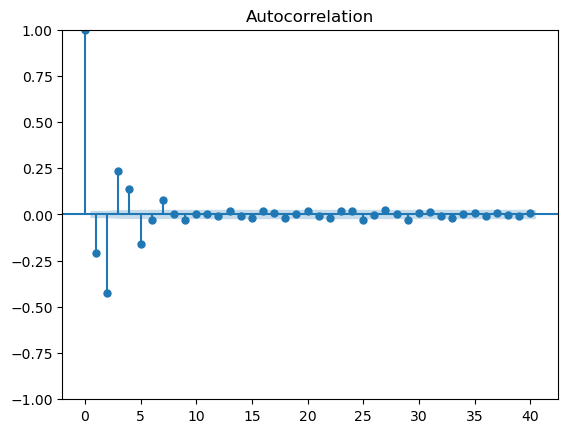

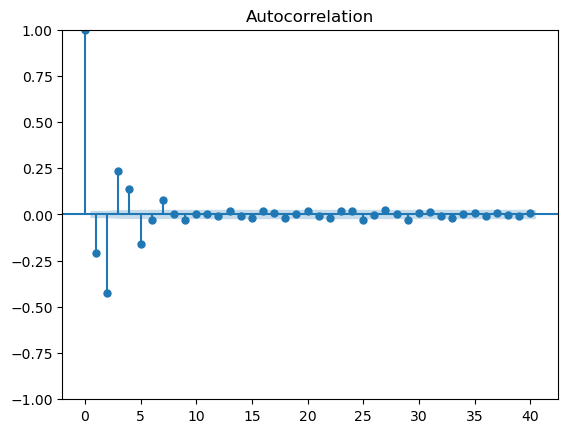

In [13]:
plot_acf(simulated_AR2_data)

The coefficient is slowly decaying. This means that it is unlikely a moving average process and it suggests that the time series can probably be modelled with an autoregressive process

/Users/jaimesastrecrespo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


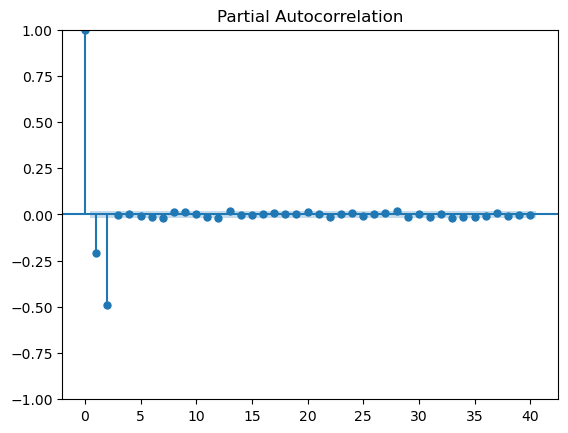

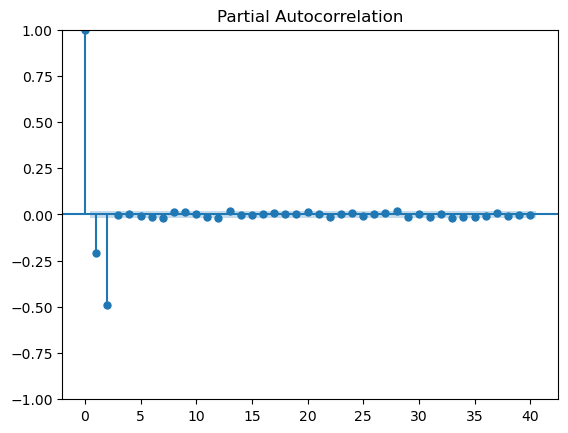

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(simulated_AR2_data)

Order q of the process is obtained from the ACF plot, this is the lag after which ACF crosses the upper confidence interval for the first time.
The coefficients are not significant after lag 2. Therefore, the partial autocorrelation plot is useful to determine the order of an AR(p) process

Yule-Walker equation. This equations allows us to estimate the coefficients of an AR(p) model, given that we know the order

In [19]:
import pandas as pd
data = pd.read_csv(r'./jj.csv')
data.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


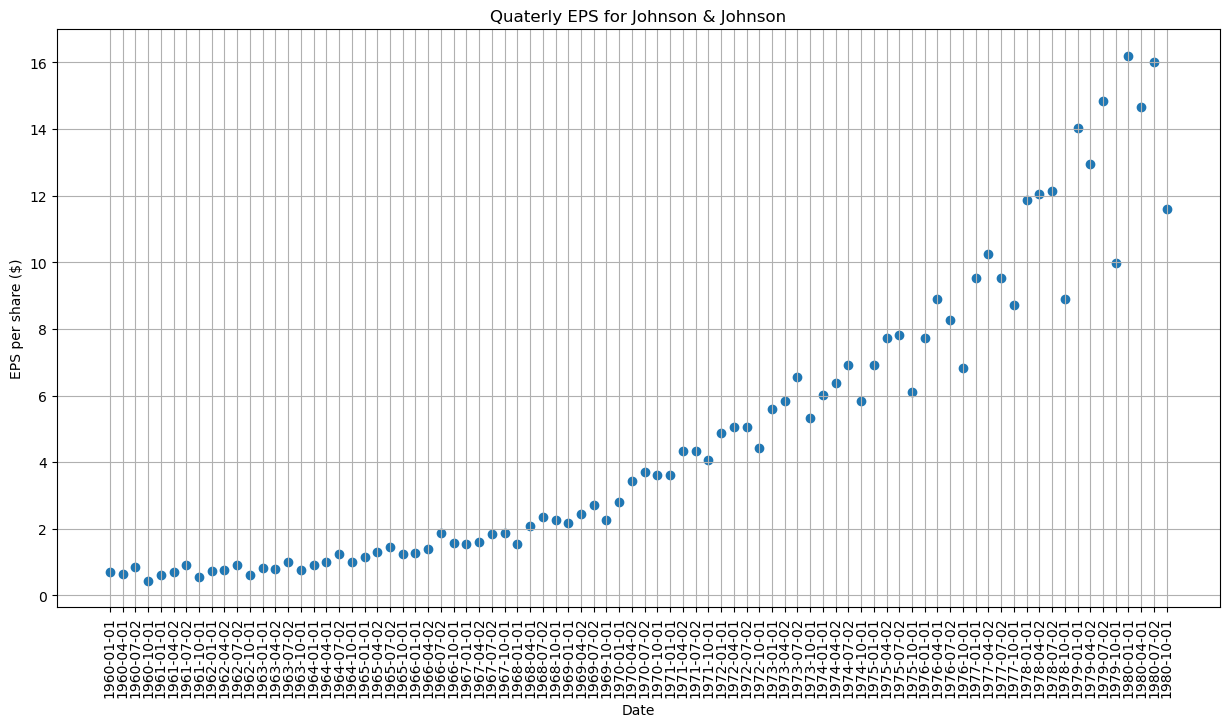

In [20]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.scatter(data['date'], data['data'])
plt.title('Quaterly EPS for Johnson & Johnson')
plt.ylabel('EPS per share ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [21]:
# Take the log difference to make data stationary
data['data'] = np.log(data['data'])
data['data'] = data['data'].diff()
data = data.drop(data.index[0])
data.head()

,date,data
1,1960-04-01,-0.119545
2,1960-07-02,0.299517
3,1960-10-01,-0.658462
4,1961-01-01,0.326684
5,1961-04-02,0.123233


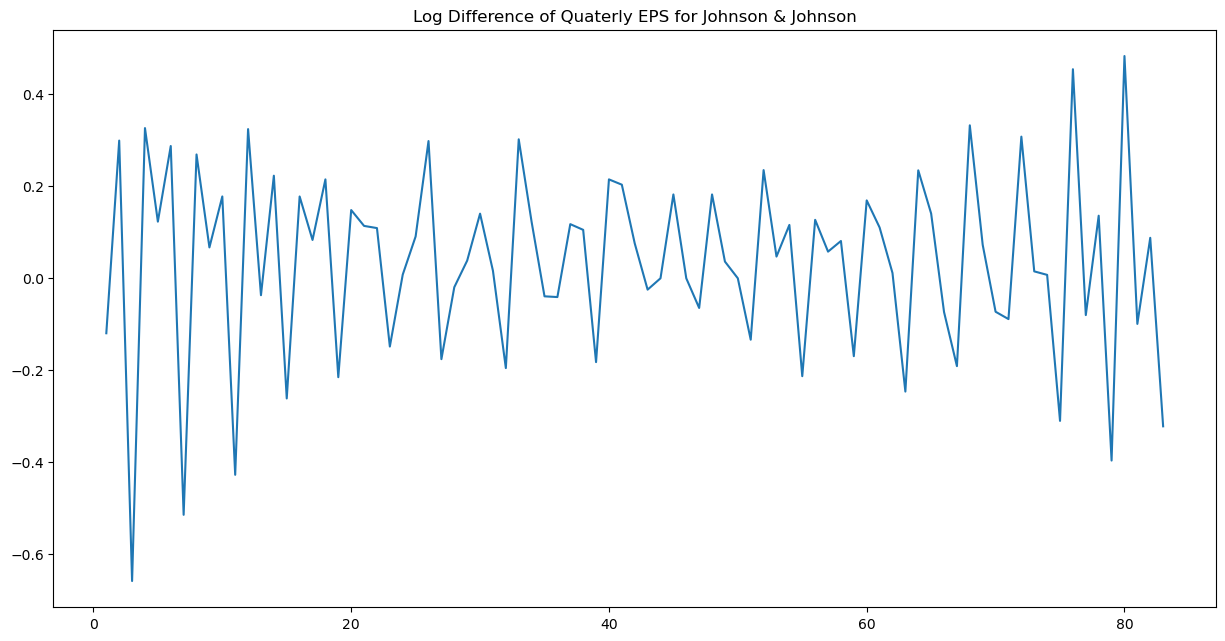

In [22]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(data['data'])
plt.title("Log Difference of Quaterly EPS for Johnson & Johnson")
plt.show()

In [23]:
from statsmodels.tsa.stattools import adfuller
ad_fuller_result = adfuller(data['data'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.317043945811821
p-value: 0.0004149731404440929


a large negative ADF statistic and p-value smaller than 0.05, we can reject the null hypothesis and say that our time series is stationary

/Users/jaimesastrecrespo/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


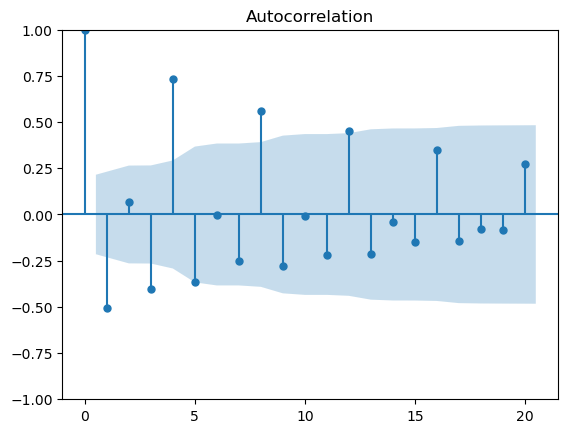

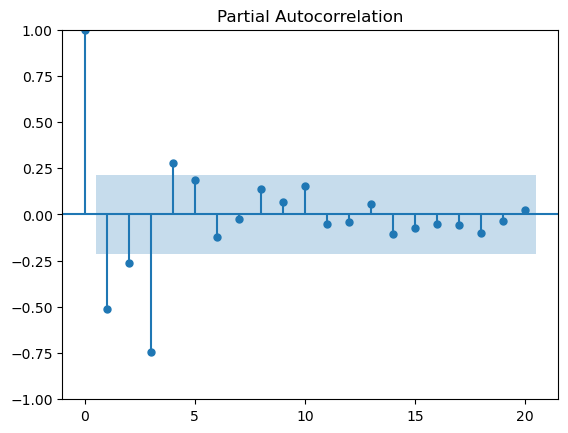

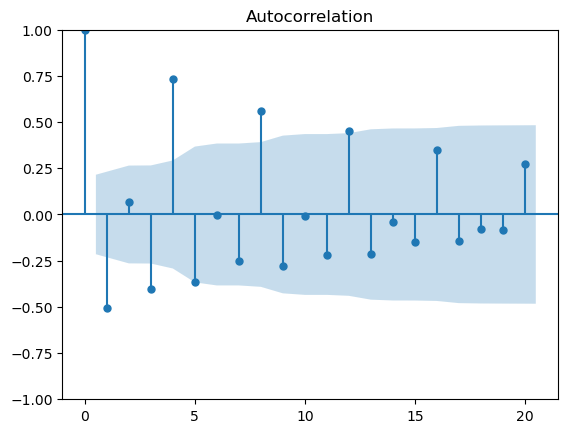

In [24]:
plot_pacf(data['data'])
plot_acf(data['data'])

In [25]:
# Try a AR(4) model
from statsmodels.regression.linear_model import yule_walker
rho, sigma = yule_walker(data['data'], 4)
print(f'rho: {-rho}')
print(f'sigma: {sigma}')

rho: [ 0.63642644  0.5364386   0.50578018 -0.27991345]
sigma: 0.11132979178317175


y=0.11+0.64 y(t-1)+0.54y(t-2)+0.5 y(t-3)-0.28y(t-4)

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

![image.png](attachment:image.png)

In [27]:
ar1 = np.array([1, 3])
ma1 = np.array([1, 4])
simulated_ARMA_data = ArmaProcess(ar1, ma1).generate_sample(nsample=10000)

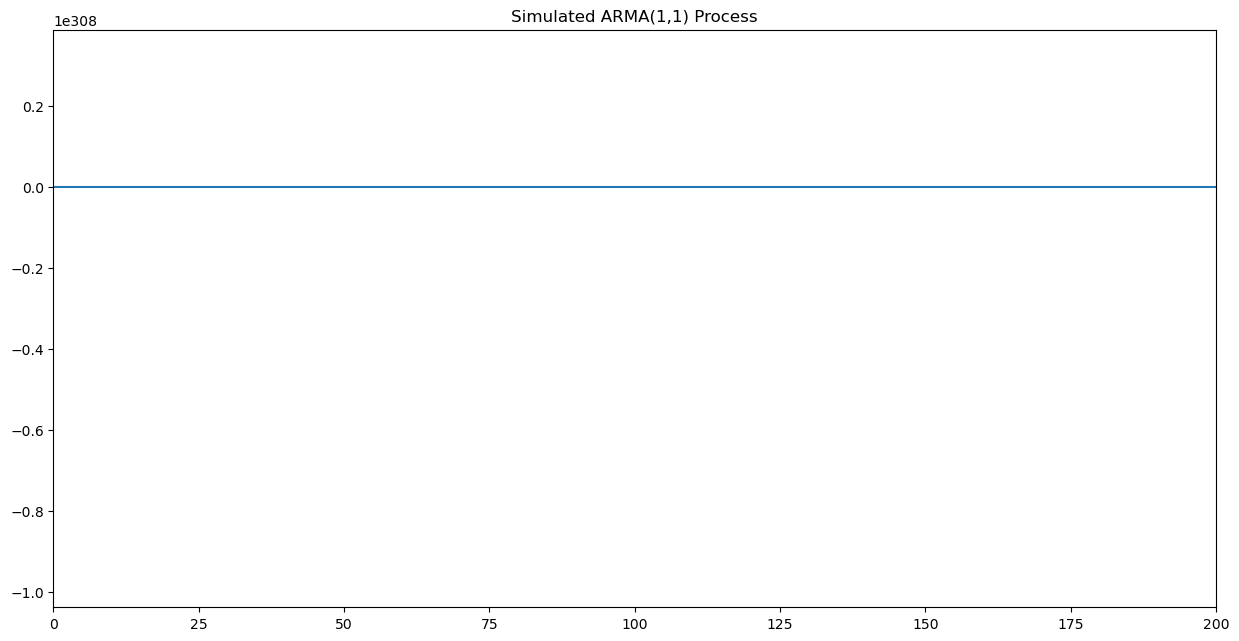

In [28]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(simulated_ARMA_data)
plt.title("Simulated ARMA(1,1) Process")
plt.xlim([0, 200])
plt.show()

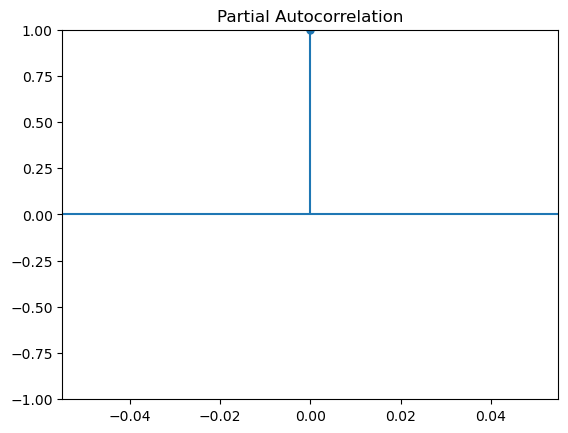

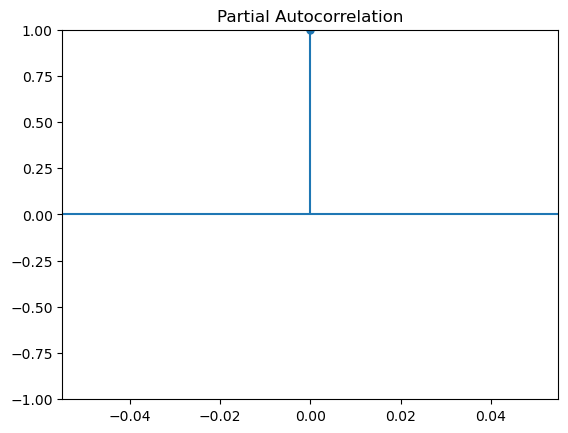

In [29]:
plot_pacf(simulated_ARMA_data)


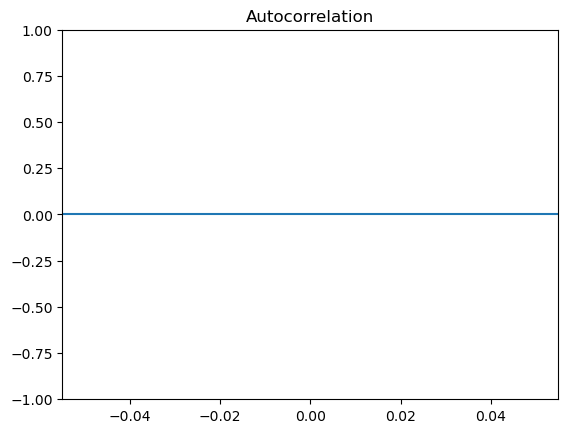

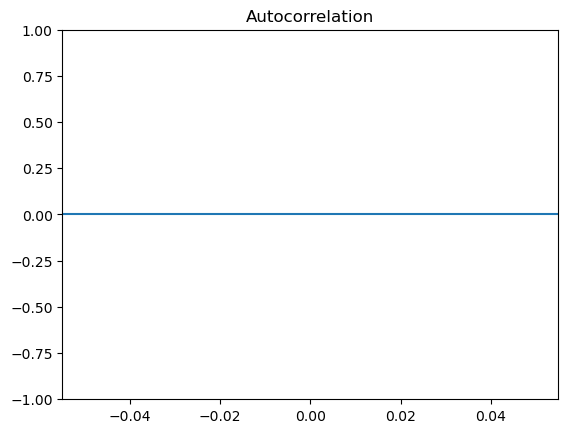

In [30]:
plot_acf(simulated_ARMA_data)

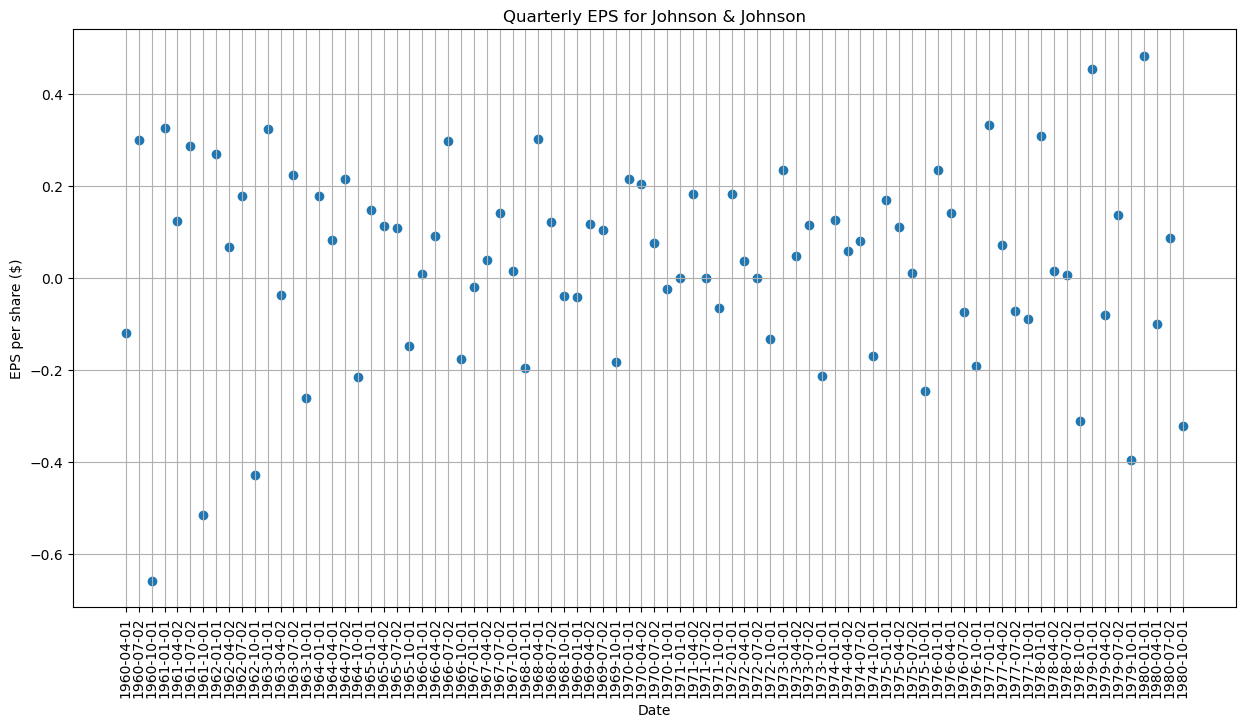

In [31]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.scatter(data['date'], data['data'])
plt.title('Quarterly EPS for Johnson & Johnson')
plt.ylabel('EPS per share ($)')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [32]:
ad_fuller_result = adfuller(data['data'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -4.317043945811821
p-value: 0.0004149731404440929


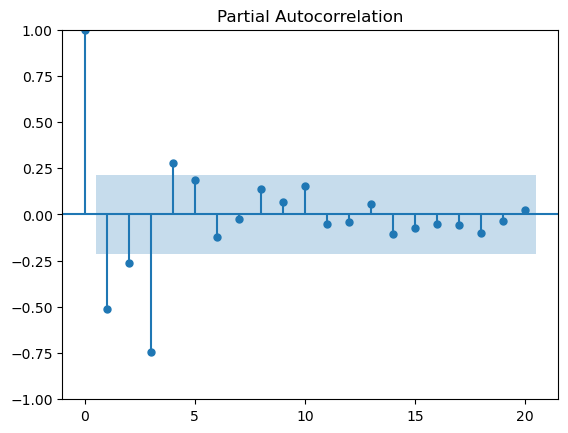

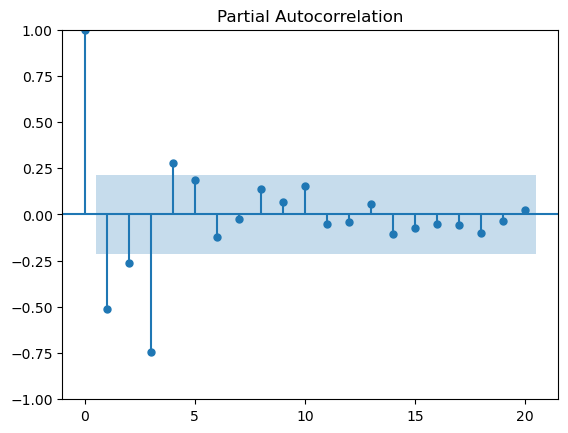

In [33]:
plot_pacf(data['data'])


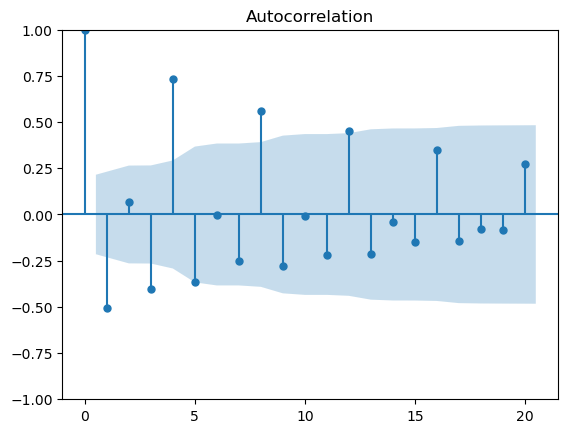

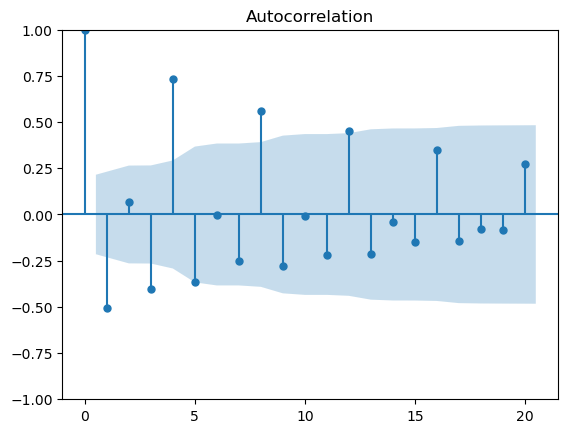

In [34]:
plot_acf(data['data'])

In [35]:
def optimize_ARIMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, d, q) tuples
        exog - the exogenous variable
    """
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(exog, order=order).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [36]:
import pmdarima as pm

In [37]:
import numpy as np
from pmdarima.datasets import load_wineind

# this is a dataset from R
wineind = load_wineind().astype(np.float64)



In [38]:
# fit stepwise auto-ARIMA
stepwise_fit = pm.auto_arima(wineind, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3066.492, Time=0.26 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3131.408, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3097.884, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3066.329, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=3089.456, Time=0.04 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3067.457, Time=0.17 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=3067.481, Time=0.35 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=3071.631, Time=0.10 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.83 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=3117.921, Time=0.15 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=3065.533, Time=0.13 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=3087.883, Time=0.05 sec
 ARIMA(0,1,2)(1,1,1)[12]             : AIC=3066.239, Time=0.24 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=3066.373, Time=0.46 sec
 ARIMA(0,1,2)(1,1,0)[12]

In [40]:
arima_data = data['data']

In [42]:
# fit stepwise auto-ARIMA
stepwise_fit = pm.auto_arima(arima_data, start_p=0, start_q=0,
                             max_p=30, max_q=30, m=12,
                             start_P=0, seasonal=True,
                             d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=16.587, Time=0.06 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=14.702, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-32.560, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-33.269, Time=0.02 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-32.555, Time=0.09 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=-30.567, Time=0.17 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=-37.788, Time=0.03 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-36.263, Time=0.10 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=-36.266, Time=0.12 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=-34.265, Time=0.10 sec
 ARIMA(3,1,0)(0,1,0)[12]             : AIC=-88.913, Time=0.05 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=-90.545, Time=0.23 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=-96.660, Time=0.90 sec
 ARIMA(3,1,0)(2,1,1)[12]             : 

In [43]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   83
Model:             SARIMAX(4, 1, 1)x(2, 1, [], 12)   Log Likelihood                  59.735
Date:                             Wed, 16 Nov 2022   AIC                           -103.469
Time:                                     12:28:57   BIC                            -85.481
Sample:                                          0   HQIC                           -96.324
                                              - 83                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6367      0.194     -3.286      0.001      -1.016      -0.257
ar.L2         -0.4534      0.213     -2.131      0.033      -0.870      -0.036
ar.L3         -0.4492      0.206     -2.182      0.029      -0.853      -0.046
ar.L4          0.3131      0.182      1.725      0.085      -0.043       0.669
ma.L1         -0.8601      0.118     -7.291      0.000      -1.091      -0.629
ar.S.L12      -0.4786      0.176     -2.713      0.007      -0.824      -0.133
ar.S.L24      -0.3624      0.149     -2.428      0.015      -0.655      -0.070
sigma2         0.0092      0.002      5.699      0.000       0.006       0.012
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                 0.77
Prob(Q):                              0.63   Prob(JB):                         0.68
Heteroskedasticity (H):               0.61   Skew:                             0.25
Prob(H) (two-sided):                  0.24   Kurtosis:                         3.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""